In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.manual_seed(1)

In [3]:
IF_DOWNLOAD = False
EPOCH = 1
BATCH_SIZE = 32
LR = 0.005
N_TEST_IMG = 5

In [4]:
train_data = torchvision.datasets.MNIST(
            root='./mnist/',
            train=True,
            transform=torchvision.transforms.ToTensor(),
            download=IF_DOWNLOAD,
            )

In [5]:
train_data.train_data.shape

torch.Size([60000, 28, 28])

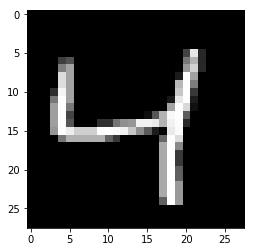

In [6]:
plt.imshow(train_data.train_data[2], cmap='gray')

In [7]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [65]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1), # Encoder最後一層不需要activation function
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(), 
            nn.Linear(256, 512),
            nn.ReLU(), 
            nn.Linear(512, 28*28),
            nn.ReLU(), 
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [66]:
autoencoder = AutoEncoder()
autoencoder = autoencoder.cuda()
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=784, bias=True)
    (11): ReLU()
  )
)


In [70]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = LR)
loss_func = nn.MSELoss()

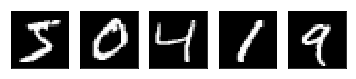

In [71]:
# initialize figure
f, a = plt.subplots(1, 5)

view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.0

for i in range(N_TEST_IMG):
    a[i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[i].set_xticks(()); a[i].set_yticks(())
view_data = view_data.cuda()

Epoch: 0 | train loss: 0.1051
Epoch: 0 | train loss: 0.0719
Epoch: 0 | train loss: 0.0683
Epoch: 0 | train loss: 0.0649
Epoch: 0 | train loss: 0.0726
Epoch: 0 | train loss: 0.0528
Epoch: 0 | train loss: 0.0741
Epoch: 0 | train loss: 0.0657
Epoch: 0 | train loss: 0.0621
Epoch: 0 | train loss: 0.0639
Epoch: 0 | train loss: 0.0563
Epoch: 0 | train loss: 0.0609
Epoch: 0 | train loss: 0.0602
Epoch: 0 | train loss: 0.0661
Epoch: 0 | train loss: 0.0638
Epoch: 0 | train loss: 0.0630
Epoch: 0 | train loss: 0.0595
Epoch: 0 | train loss: 0.0641
Epoch: 0 | train loss: 0.0612


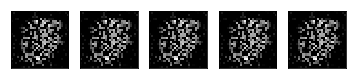

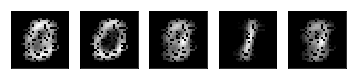

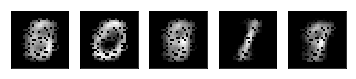

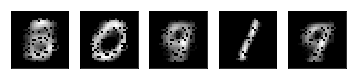

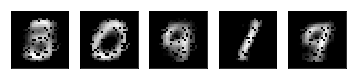

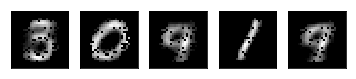

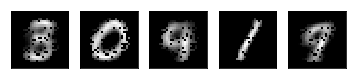

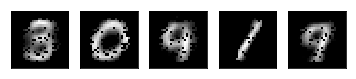

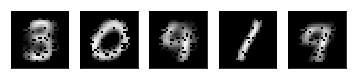

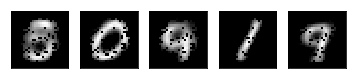

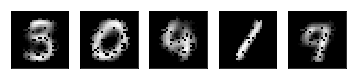

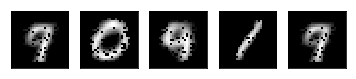

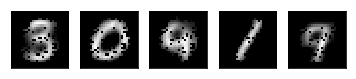

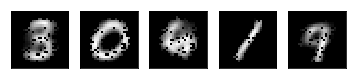

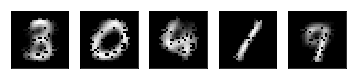

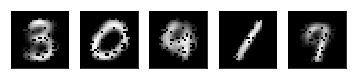

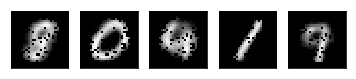

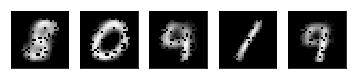

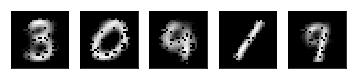

In [72]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        # print(step, x.shape, y.shape)
        
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28) # 雖然不需要label，但需要一組ground truth來比對
        
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        
        encoded, decoded = autoencoder(b_x)
        
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Epoch:', epoch, '| train loss: %.4f' % loss.data.cpu().numpy())
            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(1, 5)

            for i in range(N_TEST_IMG):
                a[i].imshow(np.reshape(decoded_data.data.cpu().numpy()[i], (28, 28)), cmap='gray'); a[i].set_xticks(()); a[i].set_yticks(())


In [73]:
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/john/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:04<00:00, 11007283.84it/s]
